# ISOM672: Introduction to Business Analytics
## Final Project: Study on Invistico Airlines
### Team member: Ayah Assaadi, Kaya Aslanoba, Roch Jia, J.R. Noh, Lessly Rocha

### Part 1. Data Exploration (EDA)

In [1]:
# Import Packages
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, tree, metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit, cross_val_score, cross_validate, learning_curve, validation_curve, train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Read the file
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
# Explore the data
df.shape

(129880, 23)

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
# Data summary of numeric variables
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# Data summary of non-numeric variables
df.describe(include='object')

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [7]:
# Check if there is any missing value for each column
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
# Only the feature 'Arrival Delay in Minutes' has missing value. We will directly drop the rows with missing value
df = df.dropna()

Text(0, 0.5, 'Customer Count')

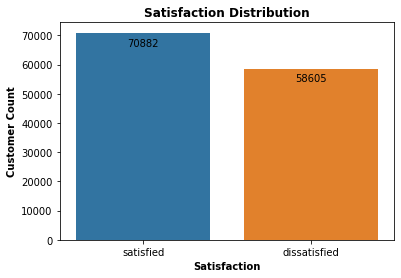

In [9]:
p = sns.countplot(x = df['satisfaction'])
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-15)
plt.title('Satisfaction Distribution', fontweight='bold')
plt.xlabel('Satisfaction', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')

# Insights: a lot of customers are not satisfied with the flight experience

Text(0, 0.5, 'Customer Count')

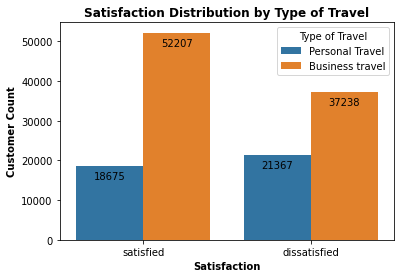

In [10]:
p = sns.countplot(x = df['satisfaction'], hue = df['Type of Travel'])
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-15)
plt.title('Satisfaction Distribution by Type of Travel', fontweight='bold')
plt.xlabel('Satisfaction', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')

# Insights: The satisfaction degree of business travelers is significantly higher than that of personal travelers

Text(0, 0.5, 'Customer Count')

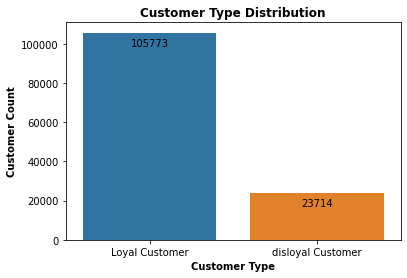

In [11]:
p = sns.countplot(x = df['Customer Type'])
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-15)
plt.title('Customer Type Distribution', fontweight='bold')
plt.xlabel('Customer Type', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')

# Insights: the majority of the customers in this dataset are loyal customers, who are the core source of income of the airline company

Text(0, 0.5, 'Customer Count')

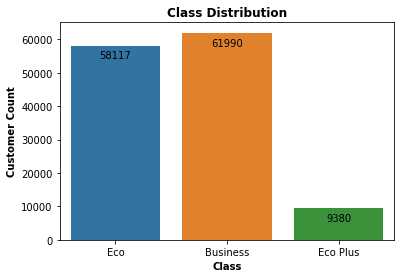

In [12]:
p = sns.countplot(x = df['Class'])
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-15)
plt.title('Class Distribution', fontweight='bold')
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')

# Insights: About half of the customers are Business Class customers (high-net-worth clients)

(0.0, 5.0)

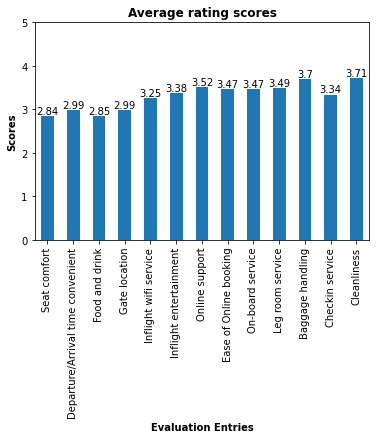

In [13]:
p = df.iloc[:, 7:20].mean().round(2).plot(kind = 'bar')
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=0)
plt.title('Average rating scores', fontweight='bold')
plt.xlabel('Evaluation Entries', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.ylim((0.0, 5.0))
# Insights: The average rating for ALL satisfaction evaluation entries are below 4; customers are more satisfied with cleanliness and baggage handling compared to other features

### Part 2. Feature Selection & Engineering

In [14]:
# Convert categorical variables to numeric format

# Satisfaction: 1 for satisfied, 0 for dissatisfied
df[['satisfaction']] = df[['satisfaction']].replace({'satisfied': 1, 'dissatisfied': 0})

# Gender: 1 for Male, 0 for Female
df[['Gender']] = df[['Gender']].replace({'Male': 1, 'Female': 0})

# Customer Type: 1 for Loyal Customer, 0 for disloyal Customer
df[['Customer Type']] = df[['Customer Type']].replace({'Loyal Customer': 1, 'disloyal Customer': 0})

# Type of Travel: 1 for Business travel, 0 for Personal Travel
df[['Type of Travel']] = df[['Type of Travel']].replace({'Business travel': 1, 'Personal Travel': 0})

# Class: 0 for Eco, 1 for Eco Plus, 2 for Business
df[['Class']] = df[['Class']].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2})

#### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

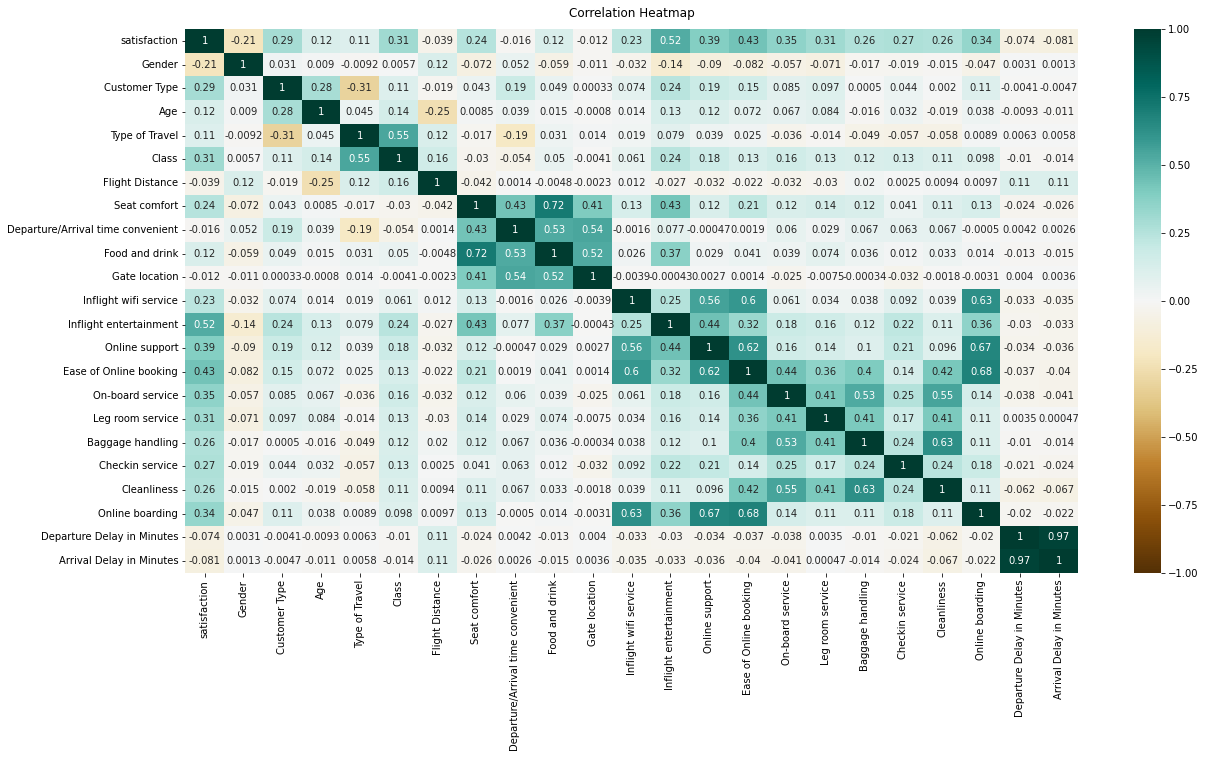

In [15]:
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Lasso Regression Path

In [16]:
# Create target variable
y = df['satisfaction']

In [17]:
# Create features and divide them into three groups (for a better view of Lasso regression plots)
X_sub1 = df.iloc[:, 1:8]
X_sub2 = df.iloc[:, 8:15]
X_sub3 = df.iloc[:, 15:23]

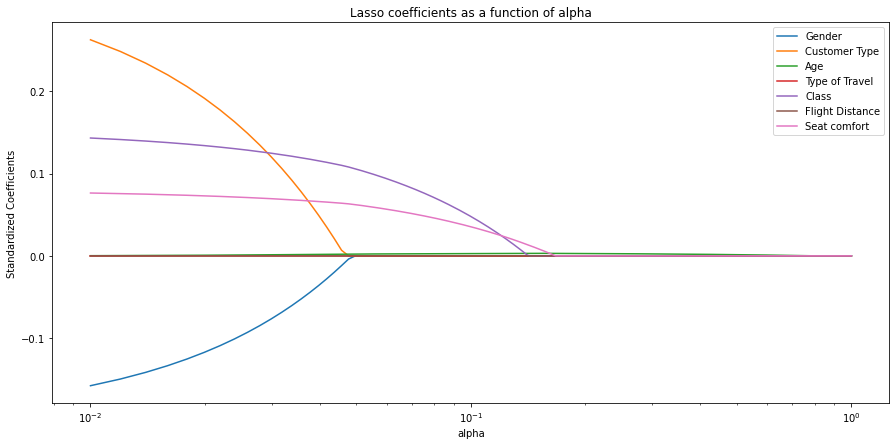

In [18]:
alphas = np.linspace(0.01, 1, 500)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_sub1, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(15, 7))
plt.gca()
plt.plot(alphas, coefs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.legend(X_sub1, loc = 'upper right')

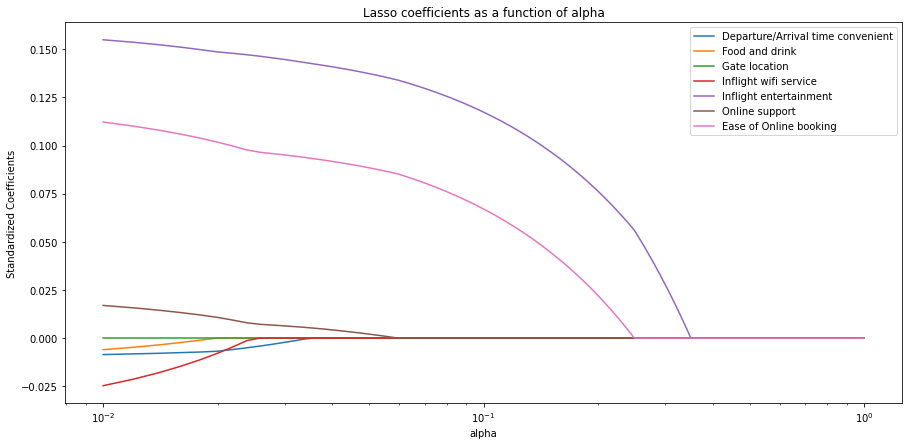

In [19]:
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_sub2, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(15, 7))
plt.gca()
plt.plot(alphas, coefs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.legend(X_sub2, loc = 'upper right')

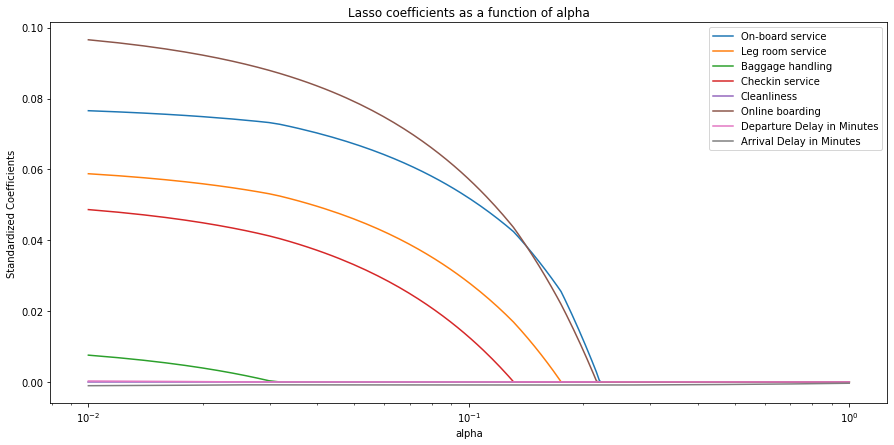

In [20]:
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_sub3, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(15, 7))
plt.gca()
plt.plot(alphas, coefs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.legend(X_sub3, loc = 'upper right')

#### Selection logics and decisions

After drawing correlation heatmap and lasso regression plot, we found that:

1. In correlation heatmap, Flight Distance, Departure/Arrival Time Convenient, Gate Location, Departure Delay in Minutes, Arrival Delay in Minutes shows extremely weak correlation with the target variable (corr coef < 0.1).
2. In Lasso Regression plots, the coefficients of Age, Flight Distance, Gate Location, Departure Delay in Minutes, Arrival Delay in Minutes are always around zero (even at very low penalty rate).

Based on the above observation, we decide to drop Flight Distance, Gate Location, Departure Delay in Minutes and Arrival Delay in Minutes and keep other features.

In [22]:
# Set feature variables
X = df.drop(['satisfaction', 'Flight Distance', 'Gate location', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis = 1).values
y = df['satisfaction'].values

array([[ 0,  1, 65, ...,  5,  3,  2],
       [ 1,  1, 47, ...,  2,  3,  2],
       [ 0,  1, 15, ...,  4,  4,  2],
       ...,
       [ 1,  0, 69, ...,  2,  3,  2],
       [ 1,  0, 66, ...,  2,  1,  2],
       [ 0,  0, 38, ...,  3,  3,  3]], dtype=int64)

### Part 3. Model Training and Exploration

Data split method: Cross Validation (Training & Test, 80%-20%)

Evaluation metrics: Accuracy, Precision, Recall, ROC/AUC (in this business problem, we care more about precision)

Cross Validation Folds: 10 folds

In [58]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Set evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#### Model 1. Decision Tree

In [60]:
# Model training
dt = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
# Cross Validation
scores_dt = cross_validate(estimator=dt,X=X_train, y=y_train, cv=10, scoring=scoring)

print("Accuracy: %0.4f (+/- %0.4f)" % (scores_dt.get("test_accuracy").mean(), scores_dt.get("test_accuracy").std()))
print("Precision: %0.4f (+/- %0.4f)" % (scores_dt.get("test_precision").mean(), scores_dt.get("test_precision").std()))
print("Recall: %0.4f (+/- %0.4f)" % (scores_dt.get("test_recall").mean(), scores_dt.get("test_recall").std()))
print("F Measure: %0.4f (+/- %0.4f)" % (scores_dt.get("test_f1").mean(), scores_dt.get("test_f1").std()))
print("ROC AUC: %0.4f (+/- %0.4f)" % (scores_dt.get("test_roc_auc").mean(), scores_dt.get("test_roc_auc").std()))

Accuracy: 0.9377 (+/- 0.0028)
Precision: 0.9415 (+/- 0.0025)
Recall: 0.9450 (+/- 0.0032)
F Measure: 0.9433 (+/- 0.0026)
ROC AUC: 0.9369 (+/- 0.0028)


#### Model 2. kNN

In [62]:
# Model Training
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski', n_jobs=-1, weights='uniform')

knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [63]:
# Cross Validation
scores_knn = cross_validate(estimator=knn, X=X_train_std, y=y_train, cv=10, scoring=scoring)

print("Accuracy: %0.4f (+/- %0.4f)" % (scores_knn.get("test_accuracy").mean(), scores_knn.get("test_accuracy").std()))
print("Precision: %0.4f (+/- %0.4f)" % (scores_knn.get("test_precision").mean(), scores_knn.get("test_precision").std()))
print("Recall: %0.4f (+/- %0.4f)" % (scores_knn.get("test_recall").mean(), scores_knn.get("test_recall").std()))
print("F Measure: %0.4f (+/- %0.4f)" % (scores_knn.get("test_f1").mean(), scores_knn.get("test_f1").std()))
print("ROC AUC: %0.4f (+/- %0.4f)" % (scores_knn.get("test_roc_auc").mean(), scores_knn.get("test_roc_auc").std()))

Accuracy: 0.9239 (+/- 0.0017)
Precision: 0.9460 (+/- 0.0031)
Recall: 0.9134 (+/- 0.0017)
F Measure: 0.9294 (+/- 0.0015)
ROC AUC: 0.9629 (+/- 0.0017)


#### Model 3. Logistic Regression

In [64]:
# Model Training
logits = LogisticRegression(multi_class='auto', C=1, max_iter=10000, random_state=1)

logits.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=1)

In [65]:
scores_logits = cross_validate(estimator=logits, X=X_train, y=y_train, cv=10, scoring=scoring)

print("Accuracy: %0.4f (+/- %0.4f)" % (scores_logits.get("test_accuracy").mean(), scores_logits.get("test_accuracy").std()))
print("Precision: %0.4f (+/- %0.4f)" % (scores_logits.get("test_precision").mean(), scores_logits.get("test_precision").std()))
print("Recall: %0.4f (+/- %0.4f)" % (scores_logits.get("test_recall").mean(), scores_logits.get("test_recall").std()))
print("F Measure: %0.4f (+/- %0.4f)" % (scores_logits.get("test_f1").mean(), scores_logits.get("test_f1").std()))
print("ROC AUC: %0.4f (+/- %0.4f)" % (scores_logits.get("test_roc_auc").mean(), scores_logits.get("test_roc_auc").std()))

Accuracy: 0.8343 (+/- 0.0031)
Precision: 0.8480 (+/- 0.0033)
Recall: 0.8503 (+/- 0.0046)
F Measure: 0.8491 (+/- 0.0030)
ROC AUC: 0.9068 (+/- 0.0027)


### Part 4. Parameter Tuning

In [30]:
# Nested Cross-validation
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

#### Model 1. Decision Tree

In [33]:
estimator = DecisionTreeClassifier(random_state=42)
dt_pt = GridSearchCV(estimator=estimator, 
                  param_grid=[{'max_depth': range(2,11), 
                  'criterion':['gini','entropy'], 
                  'min_samples_leaf': [1, 2, 3, 4, 5],
                  'min_samples_split': [2, 3, 4, 5]}], 
                  scoring='precision', cv=inner_cv,
                  n_jobs=-1).fit(X_train, y_train)

print("\n Parameter Tuning: Decision Tree")
print("Non-nested CV Precision: ", dt_pt.best_score_)
print("Optimal Parameter: ", dt_pt.best_params_)
print("Optimal Estimator: ", dt_pt.best_estimator_)
nested_score_dt = cross_val_score(dt_pt, X=X_train, y=y_train, scoring='precision', cv=outer_cv)
print("Nested CV Precision: ", nested_score_dt.mean(), " +/- ", nested_score_dt.std())


 Parameter Tuning: Decision Tree
Non-nested CV Precision:  0.9402984953557144
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)
Nested CV Precision:  0.9402291268728797  +/-  0.002949812734064701


#### Model 2. kNN

In [34]:
pipe = Pipeline([('sc', StandardScaler()), ('knn', KNeighborsClassifier(metric='minkowski'))])

params = {'knn__n_neighbors': range(1, 21),
            'knn__weights': ['uniform', 'distance'],
            'knn__p': [1, 2]}

# Choosing k for kNN
knn_pt = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='precision',
                  cv=inner_cv,
                  n_jobs=-1).fit(X_train_std, y_train)

print("\n Parameter Tuning: kNN")
print("Non-nested CV Precision: ", knn_pt.best_score_)
print("Optimal Parameter: ", knn_pt.best_params_)
print("Optimal Estimator: ", knn_pt.best_estimator_)
nested_score_knn = cross_val_score(knn_pt, X=X_train_std, y=y_train, scoring='precision', cv=outer_cv)
print("Nested CV Precision: ",nested_score_knn.mean(), " +/- ", nested_score_knn.std())


 Parameter Tuning: kNN
Non-nested CV Precision:  0.9716338877071576
Optimal Parameter:  {'knn__n_neighbors': 2, 'knn__p': 1, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2, p=1))])
Nested CV F-Measure:  0.9716338877071576  +/-  0.0019412993293537297


#### Model 3. Logistic Regression

In [35]:
logits_pt = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                              'penalty': ['l1','l2']
                              }],
                  scoring='precision',
                  cv=inner_cv,
                  n_jobs=-1).fit(X_train, y_train)

print("\n Parameter Tuning: Logits")
print("Non-nested CV Precision: ", logits_pt.best_score_)
print("Optimal Parameter: ", logits_pt.best_params_)
print("Optimal Estimator: ", logits_pt.best_estimator_)
nested_score_logits = cross_val_score(logits_pt, X=X_train, y=y_train, scoring='precision', cv=outer_cv)
print("Nested CV F Precision:",nested_score_logits.mean(), " +/- ", nested_score_logits.std())


 Parameter Tuning: Logits
Non-nested CV F Measure:  0.847769388289451
Optimal Parameter:  {'C': 10000, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=10000, random_state=42, solver='liblinear')
Nested CV F Measure: 0.8477576757367229  +/-  0.005792694027579907


### Part 5. Model Evaluation

#### Decision Tree

In [66]:
# Define models with optimal parameters
dt_train = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, random_state = 42)

dt_pred = dt_train.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

Dissatisfied       0.92      0.93      0.93     11821
   Satisfied       0.94      0.94      0.94     14077

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



#### kNN

In [67]:
knn_train = KNeighborsClassifier(n_neighbors = 2, p = 1, metric='minkowski', weights = 'uniform')

knn_pred = knn_train.fit(X_train_std, y_train).predict(X_test_std)

              precision    recall  f1-score   support

Dissatisfied       0.88      0.97      0.92     11821
   Satisfied       0.97      0.88      0.93     14077

    accuracy                           0.92     25898
   macro avg       0.92      0.93      0.92     25898
weighted avg       0.93      0.92      0.92     25898



##### Logistic Regression

In [68]:
logits_train = LogisticRegression(C = 10000, solver='liblinear', penalty = 'l2', random_state=42)

logits_train.fit(X_train, y_train)

logits_pred = logits_train.predict(X_test)
logits_pred_prob = logits_train.predict_proba(X_test)

              precision    recall  f1-score   support

Dissatisfied       0.82      0.81      0.82     11821
   Satisfied       0.84      0.85      0.85     14077

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898



#### Comparison & Model Selection

##### Metrics

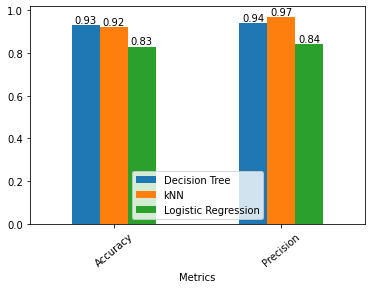

In [69]:
metrics = {'Metrics': ['Accuracy', 'Precision'],
            'Decision Tree': [accuracy_score(y_test, dt_pred), precision_score(y_test, dt_pred)],
            'kNN': [accuracy_score(y_test, knn_pred), precision_score(y_test, knn_pred)],
            'Logistic Regression':[accuracy_score(y_test, logits_pred), precision_score(y_test, logits_pred)]}
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.round(2)

p = df_metrics.plot.bar(x = 'Metrics', y = ['Decision Tree', 'kNN', 'Logistic Regression'], rot = 40)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=0)

##### ROC AUC

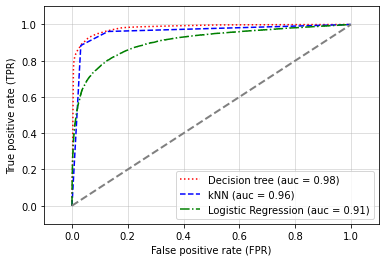

In [92]:
clf_labels = ['Decision tree', 'kNN', 'Logistic Regression']
all_clf = [DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, random_state = 42), 
          KNeighborsClassifier(n_neighbors = 2, p = 1, metric='minkowski', weights = 'uniform'), 
          LogisticRegression(C = 10000, solver='liblinear', penalty = 'l2', random_state=42)]
colors = [ 'red', 'blue', 'green']
linestyles = [':', '--', '-.']
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train_std, y_train).predict_proba(X_test_std)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

##### Profit Curve

Reference: https://github.com/SydneyLauren/Profit-curves-and-xkcd-plotting/blob/master/Profit_Curves.ipynb

In [93]:
# Cost-benefit assumptions
# Assumptions:
# 1. the future LTV (Life Time Value) of satisfied customers is 1 per customer on average
# 2. if we predict that the customer is satisfied, we do not need to take any extra action (extra cost = 0)
# 3. the extra cost to retain a dissatisfied customer is 0.2 (for example, to deliver extra flight coupons)
# 4. if we take actions to retain the predicted dissatisfied customers, their future LTV would be 0.8, 
# otherwise it would be 0.2 for dissatisfied customers
# 5. we only care about FUTURE revenue and cost, instead of those happening in the past, and we don't care about the regular customer maintenance cost

cb_TP = 1
cb_FP = 0.2
cb_FN = 0.8 # 1 - 0.2
cb_TN = 0.6 # 0.8 - 0.2
cb_matrix = np.array([[cb_TP, cb_FP],[cb_FN, cb_TN]])

In [94]:
#Convert to standard confusion matrix
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [95]:
# Calculate profit curve
def profit_curve(cb, predict_probas, labels):
    # predict_probas = round(predict_probas,4)
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [99]:
# Plot the profit curves
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    print('Max Point:', max_threshold, max_profit)
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

Max Point: 0.657439446366782 0.7993590238628465
Max Point: 0.5 0.7990423970963009
Max Point: 0.7074327752750429 0.7748088655494633


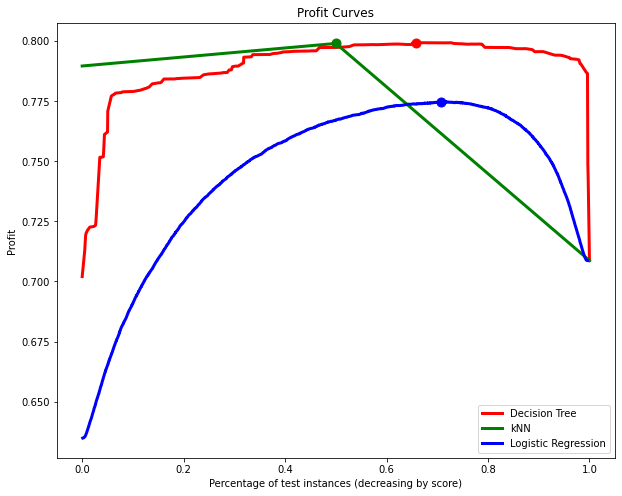

In [100]:
models = [DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, random_state = 42), 
          KNeighborsClassifier(n_neighbors = 2, p = 1, metric='minkowski', weights = 'uniform'), 
          LogisticRegression(C = 10000, solver='liblinear', penalty = 'l2', random_state=42)]
labels = ['Decision Tree', 'kNN', 'Logistic Regression']
fig = plt.figure(figsize=(10,8))

colors = ['r', 'g', 'b']
for i, model in enumerate(models):
    plot_profit_curve(model, labels[i], cb_matrix, X_train_std, X_test_std, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.show()

Based on the former performance analysis, we decide to choose kNN as our optimal model

#### Optimal Model

##### Classification Report

In [ ]:
print(classification_report(y_test, knn_pred, target_names = ['Dissatisfied', 'Satisfied']))

##### Confusion Matrix

Confusion matrix: kNN


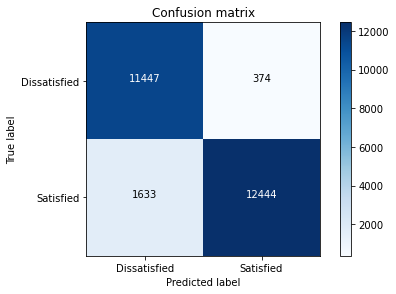

In [105]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         #shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       #add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          #choose format depending on whether the confusion matrix is normalizaed or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, knn_pred)                                                    

# Plot non-normalized confusion matrix
plt.figure()
print('Confusion matrix: kNN')
plot_confusion_matrix(cnf_matrix, 
                      classes=['Dissatisfied', 'Satisfied'],
                      title='Confusion matrix')